In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
refPt = []
cropping = False

In [3]:
def click_and_crop(event, x, y, flags, param):
    
    # grab references to the global variables
    global refPt, cropping
    
    # if the left mouse button was clicked, record the starting 
    # (x,y) coordinates and indicate the cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x,y)]
        cropping = True
        print(".........a.....a.......a")
    
    # check to see if the left mouse was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x,y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x,y))
        cropping = False
        print("BAU")
        

In [4]:
def watch_webcam():
    cv2.namedWindow("preview")
    vc = cv2.VideoCapture(0)
    
    while vc.isOpened():
        _, frame = vc.read()
        img = frame
        # clone the image
        clone = img.copy()
        
        key = cv2.waitKey(100)
        cv2.imshow("preview", img)
        cv2.setMouseCallback("preview", click_and_crop)
        
        if len(refPt) == 2:
            roi = clone[refPt[0][1]:refPt[1][1],refPt[0][0]:refPt[1][0]]
            #cv2.imshow("ROI",roi)
            
            img_to_save = 'digit.jpeg'
            cv2.imwrite(img_to_save, roi)
        
            
        
        if key == 27: # exit on ESC
            #name_file = name_person + ".jpg"
            #cv2.imwrite(name_file,bndbox)
            break
           
    vc.release()
    cv2.destroyWindow("preview")

In [8]:
watch_webcam()

.........a.....a.......a
BAU


# Convert to Gray

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Load the image

/home/merlin/.virtualenvs/dl4cv/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


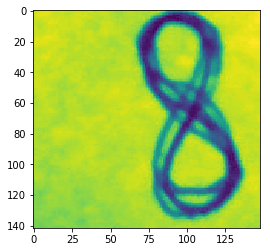

In [10]:
from scipy import misc
import numpy as np
#from PIL import Image

im = misc.imread('digit.jpeg')
im_bw = rgb2gray(im)

plt.imshow(im_bw)

# Reshape the image

img_resized.shape:  (28, 28)


/home/merlin/.virtualenvs/dl4cv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


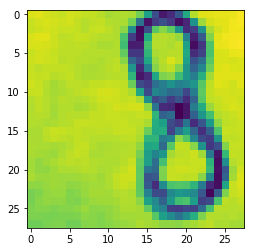

In [11]:
img_resized = misc.imresize(im_bw, (28,28))

print("img_resized.shape: ",img_resized.shape)
plt.imshow(img_resized)

# Load the model

In [16]:
from keras.models import load_model

model = load_model("model_conv.h5")


# Reshape the image for prediction

In [13]:
img_usable = np.reshape(img_resized, (1,28,28,1))

# Remember Keras accepts 4D tensors

In [14]:
print(img_usable.shape)

(1, 28, 28, 1)


# Run prediction on image

In [17]:
pred_prim = model.predict(img_usable)
digit = np.argmax(pred_prim)
print("digit: ",digit)

digit:  8
